# Testing and Training Dataset of Irish Flower 🌺

In [ ]:
import torch
import torch.nn as nn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import torch.nn.functional as f
from sklearn.metrics import accuracy_score, confusion_matrix , precision_score, recall_score, f1_score, roc_auc_score

# Load Iris dataset from Sklearn
iris = load_iris()
x = iris.data
y = iris.target


# Split dataset into training and validation (Testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

x_train=torch.FloatTensor(x_train)
x_test=torch.FloatTensor(x_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)


# Model
class model (nn.Module):
    def __init__(self,in_feat=4,h1=12,h2=12,h3=7,out_feat=3):
        super().__init__()
        self.layr1=nn.Linear(in_feat,h1)
        self.layr2=nn.Linear(h1,h2)
        self.layr3=nn.Linear(h2,h3)
        self.outlayr=nn.Linear(h3,out_feat)
    def forward(self,inpts):
        out1=f.relu(self.layr1(inpts))
        out2=f.relu(self.layr2(out1))
        out3=f.relu(self.layr3(out2))
        return self.outlayr(out3)

losses = [] # stores model weights
accuracies = [] # stores model weights

# Optimizer
net = model()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.005)

# Train
for epoch in range(30000):
    optimizer.zero_grad()
    outputs = net(x_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 5000 == 0:
        print(f'Epoch [{epoch + 1}], Loss: {loss.item():.4f}')

    with torch.no_grad():
        test_outputs = net(x_test)
        _, predicted = torch.max(test_outputs, 1)
        accuracy = accuracy_score(y_test, predicted)
        accuracies.append(accuracy)

    losses.append(loss.item())

# Test
with torch.no_grad():
    test_outputs = net(x_test)
    _, predicted = torch.max(test_outputs, 1)
    precision = precision_score(y_test, predicted, average='weighted')
    recall = recall_score(y_test, predicted, average='weighted')
    f1 = f1_score(y_test, predicted, average='weighted')

print(f'Test Accuracy: {accuracy * 100:.2f}%')

Epoch [5000], Loss: 0.0604
Epoch [10000], Loss: 0.0488
Epoch [15000], Loss: 0.0425
Epoch [20000], Loss: 0.0375
Epoch [25000], Loss: 0.0333
Epoch [30000], Loss: 0.0347
Test Accuracy: 96.67%


# Confusion Matrix Using Iris Flower Dataset


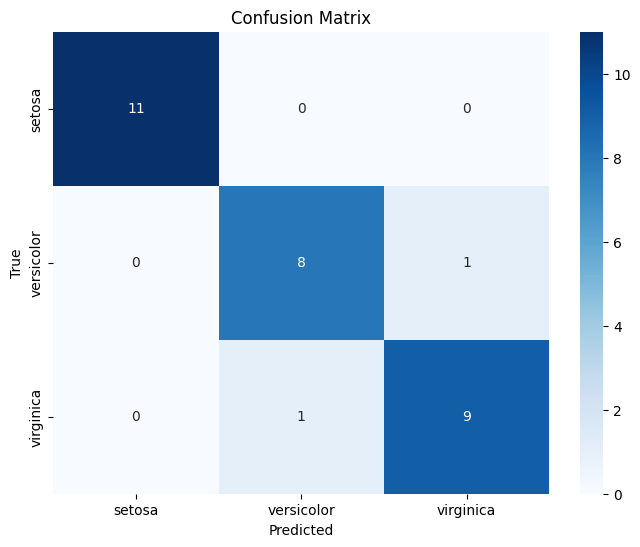

In [ ]:
import seaborn as sns

confused_matrix = confusion_matrix(y_test, predicted)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confused_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Epoch Training Loss and Testing Accuracy Graph

> Indented block



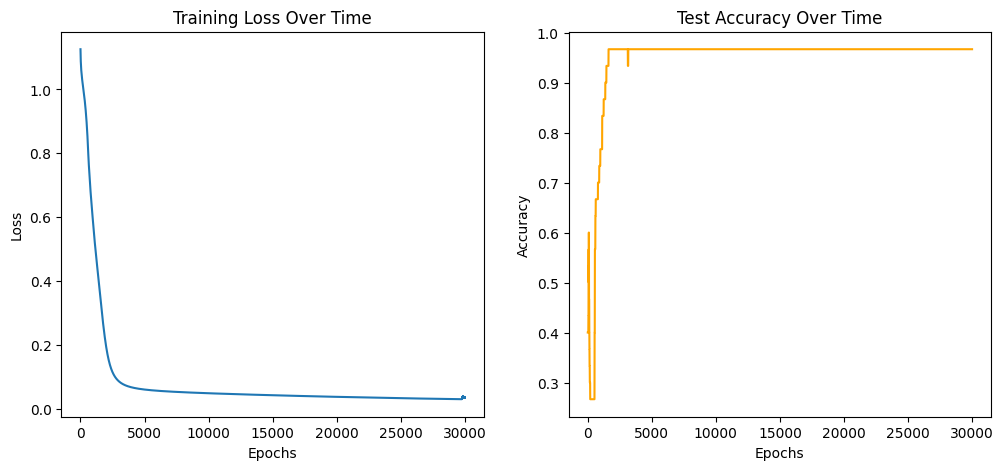

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(len(losses)), losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')


plt.subplot(1, 2, 2)
plt.plot(range(len(accuracies)), accuracies, label='Test Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy Over Time')

plt.show()

# Precision / Recall / F1 Score

In [ ]:
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Precision: 0.9333
Recall: 0.9333
F1 Score: 0.9333


# ROC / AUC

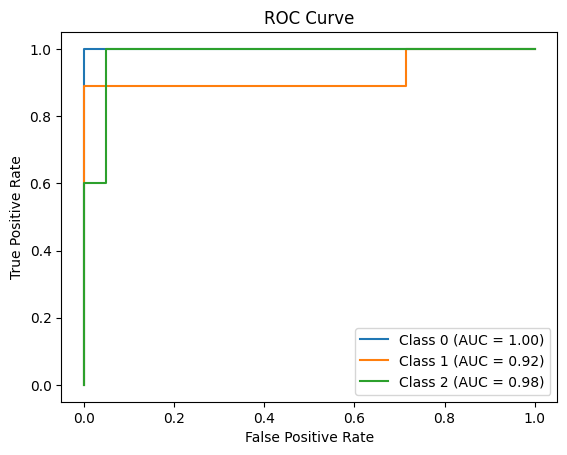

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
with torch.no_grad():
    test_outputs = net(x_test)
    probabilities = torch.softmax(test_outputs, dim=1).numpy()

for class_idx in range(3):
    fpr, tpr, _ = roc_curve(y_test == class_idx, probabilities[:, class_idx])
    auc = roc_auc_score(y_test == class_idx, probabilities[:, class_idx])
    plt.plot(fpr, tpr, label=f'Class {class_idx} (AUC = {auc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()